<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW04/Q2/HW04_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW04 : Problem 2

Please check last updates and get the latest version from following link. it is more completed but it may have some updates after release it.

[<img src="https://img.icons8.com/clouds/50/000000/github.png"/>](https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/)  
github link : https://github.com/MohammadRaziei/Deep-Learning-Course/blob/master/HW04

In [144]:
!wget -q https://github.com/MohammadRaziei/DataSetsArchive/raw/master/NWPU%20VHR-10%20dataset.zip -O 'NWPU VHR-10 dataset.zip'
!unzip -oq "NWPU VHR-10 dataset.zip" 
!rm -f "NWPU VHR-10 dataset.zip" 
print('dataset is ready to use :)')

dataset is ready to use :)


In [145]:
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/net.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/test.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/transform.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/prepare_data.py
!curl -sLO https://github.com/MohammadRaziei/Deep-Learning-Course/raw/master/HW04/Q2/visual_dataset.py

## Part O

In [146]:
from pprint import pprint
from visual_dataset import getGroundTruthList
pprint(getGroundTruthList(17))

[{(52,515),(152,594), airplane},
 {(233,393),(312,452), airplane},
 {(258,472),(333,529), airplane},
 {(272,546),(368,622), airplane},
 {(175,109),(258,187), airplane},
 {(463,9),(543,93), airplane},
 {(521,124),(618,197), airplane},
 {(451,229),(535,311), airplane},
 {(773,352),(856,425), airplane},
 {(891,282),(973,370), airplane},
 {(387,382),(443,429), storageTank},
 {(403,437),(459,478), storageTank},
 {(423,489),(475,527), storageTank},
 {(466,355),(530,403), storageTank},
 {(490,417),(555,467), storageTank},
 {(523,324),(588,374), storageTank},
 {(548,384),(614,437), storageTank},
 {(615,291),(673,332), storageTank},
 {(634,343),(693,383), storageTank},
 {(654,389),(711,435), storageTank}]


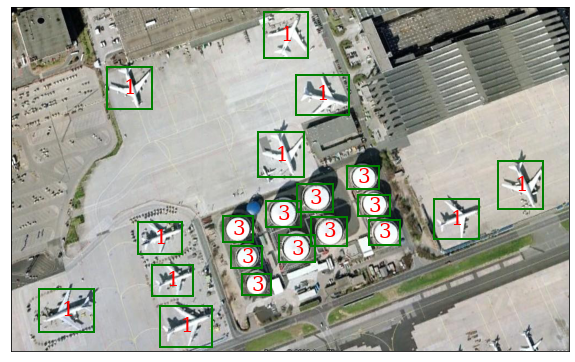

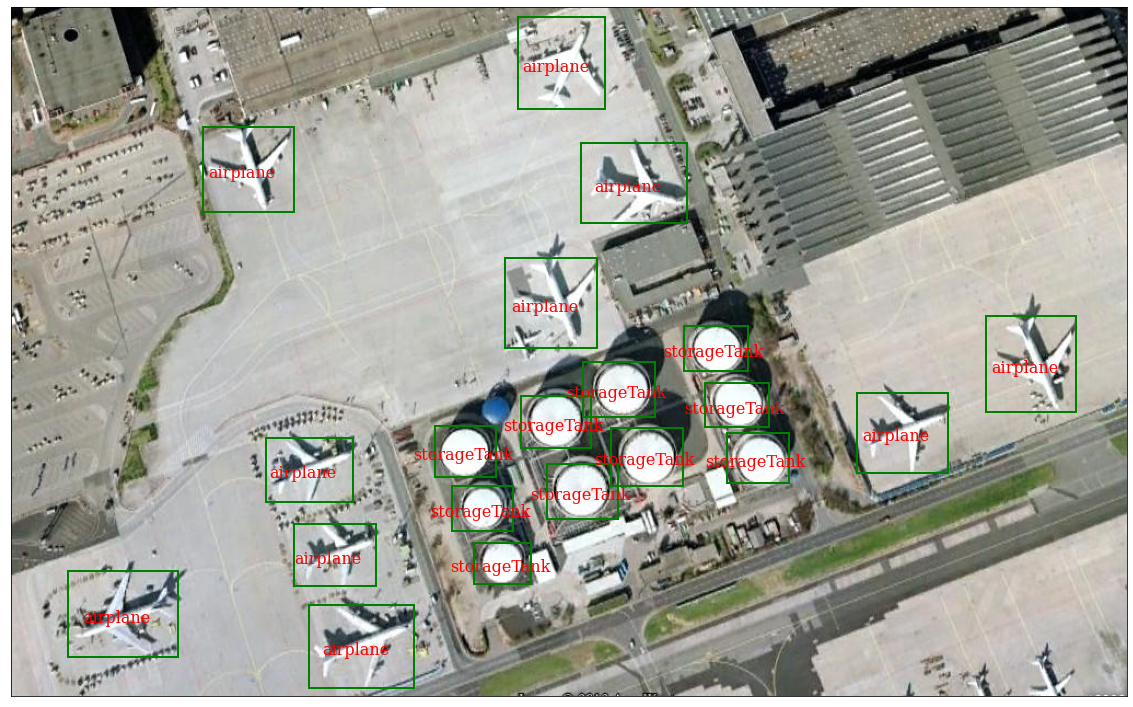

In [147]:
from visual_dataset import visual_dataset
visual_dataset(17, show_name=False, fontsize=20, figsize=(10,10))
visual_dataset(17)

## Part I

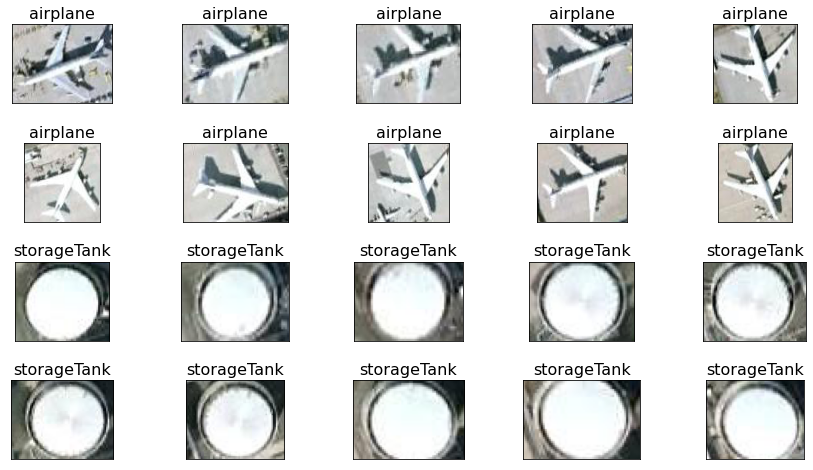

In [148]:
from prepare_data import prepare_data
import matplotlib.pyplot as plt


number = 17
cropped_images, classes = prepare_data(number)

fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(cropped_images[i])
  plt.grid(False); plt.xticks([]); plt.yticks([])
  plt.title(classes[i].name, fontdict={'color':'black', 'fontsize':16})



In [149]:
categories = [cat.value for cat in classes]
categories 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

## Part II

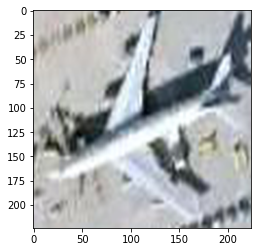

In [150]:
from transform import resize_image

img = cropped_images[0]
plt.imshow(resize_image(img, (224,224)))
plt.show()

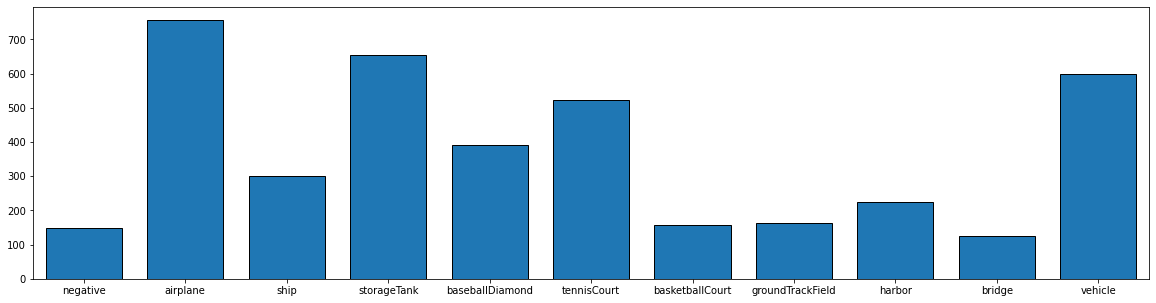

In [152]:
import numpy as np
import os
import matplotlib.pyplot as plt
from prepare_data import getGroundTruthList, ObjectType
from prepare_data import get_number_of_files


number_of_labeled_files, number_of_nonlabeled_files = get_number_of_files()

all_classes = np.array([]);
for i in range(1,number_of_labeled_files):
  groundTruthList = getGroundTruthList(i)
  classes_i = np.array([obj.object_type.value for obj in groundTruthList])
  all_classes = np.concatenate((all_classes, classes_i), axis=0)
all_classes = np.concatenate((all_classes, np.zeros(number_of_nonlabeled_files)), axis=0)

plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.hist(all_classes, bins=np.arange(0,12), rwidth=0.75, edgecolor='black')
ax.set_xticks(.5+np.arange(11))
ax.set_xlim(0,11)
ax.set_xticklabels([ObjectType(i).name for i in range(11)])
plt.show()


counts, bins = np.histogram(all_classes,bins=np.arange(-0.5,11.5), density=False)
P_removal = (counts - counts.min()) / counts

> make it balanced

Loading…: 100%|██████████████████████████| 649/649 [00:35<00:00, 18.19it/s]


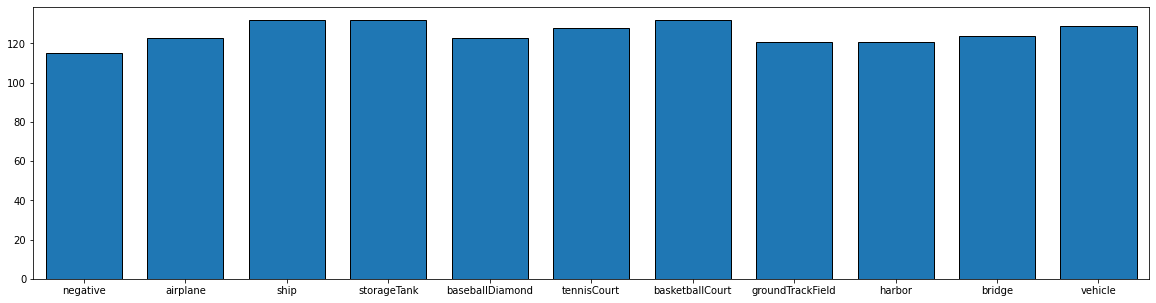

In [153]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm 
from prepare_data import getGroundTruthList, ObjectType
from prepare_data import load_negative, load_positive

np.random.seed(0)
target_size = (224, 224)

all_classes = np.array([],dtype=np.uint8);
all_images = np.zeros((0,*target_size,3));
for i in tqdm(range(1,number_of_labeled_files), desc="Loading…",  ascii=False, ncols=75): 
    images_i, classes_i = prepare_data(i)
    classes_i = np.array([cat.value for cat in classes_i])
    index_to_remove = np.where(P_removal[classes_i] > np.random.uniform(size=classes_i.shape))[0]
    len_i = classes_i.shape[0];
    classes_i = np.array([classes_i[k] for k in range(len_i) if k not in index_to_remove])
    if classes_i.shape[0] == 0: continue
    images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i) if k not in index_to_remove])
     
    all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)
    all_classes = np.concatenate((all_classes, classes_i), axis=0)

classes_i = np.zeros(number_of_nonlabeled_files, dtype=np.int64)
images_i = [load_negative(i+1) for i in range(number_of_nonlabeled_files)]
len_i = classes_i.shape[0]
index_to_remove = np.where(P_removal[classes_i] > np.random.uniform(size=classes_i.shape))[0]
classes_i = np.array([classes_i[k] for k in range(len_i) if k not in index_to_remove])
if classes_i.shape[0] > 0:
  images_i = np.array([resize_image(images_i[k],target_size) for k in range(len_i) if k not in index_to_remove])
  all_classes = np.concatenate((all_classes,classes_i), axis=0)
  all_images = np.concatenate((all_images, images_i), axis=0).astype(np.uint8)

np.savez_compressed('all_images.npz', all_images)
np.savez_compressed('all_classes.npz', all_classes)

plt.figure(figsize=(20,5))
ax = plt.subplot(111)
ax.hist(all_classes, bins=np.arange(0,12), rwidth=0.75, edgecolor='black')
ax.set_xticks(.5+np.arange(11))
ax.set_xlim(0,11)
ax.set_xticklabels([ObjectType(i).name for i in range(11)])
plt.show()


## Part III

In [154]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

all_categories = to_categorical(all_classes)
all_image_data = all_images.astype(np.float)/255.
x_train, x_test, y_train, y_test = train_test_split(all_image_data, all_categories, test_size = 0.2, shuffle=True) 
x_subtrain, x_valid, y_subtrain, y_valid = train_test_split(x_train, y_train, test_size = 0.2, shuffle=True) 

In [155]:
# from tesorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense
# load the model
pre_model = DenseNet121(weights='imagenet')
# Freeze all the layers
for layer in pre_model.layers[:]:
    layer.trainable = False

output = Dense(11,  activation='sigmoid', name='output')(pre_model.layers[-2].output)
pre_model = Model(inputs=pre_model.inputs, outputs=output)
pre_model.summary()
# plot_model(pre_model, show_shapes=True)


33193984/33188688 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_____________________________

In [156]:
pre_model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])
history = pre_model.fit(x_subtrain,
                    y_subtrain,
                    epochs=25,
                    verbose=2,
                    validation_data=(x_valid, y_valid),
                    batch_size=16
                    )

# save model and architecture to single file
pre_model.save("pre_train.h5")
print("Saved model to disk")

Epoch 1/25
56/56 - 18s - loss: 0.3025 - accuracy: 0.4292 - val_loss: 0.1841 - val_accuracy: 0.7692
Epoch 2/25
56/56 - 3s - loss: 0.1392 - accuracy: 0.8754 - val_loss: 0.1108 - val_accuracy: 0.9276
Epoch 3/25
56/56 - 3s - loss: 0.0891 - accuracy: 0.9592 - val_loss: 0.0800 - val_accuracy: 0.9683
Epoch 4/25
56/56 - 3s - loss: 0.0648 - accuracy: 0.9785 - val_loss: 0.0626 - val_accuracy: 0.9819
Epoch 5/25
56/56 - 3s - loss: 0.0511 - accuracy: 0.9773 - val_loss: 0.0524 - val_accuracy: 0.9864
Epoch 6/25
56/56 - 3s - loss: 0.0419 - accuracy: 0.9830 - val_loss: 0.0447 - val_accuracy: 0.9864
Epoch 7/25
56/56 - 3s - loss: 0.0362 - accuracy: 0.9853 - val_loss: 0.0405 - val_accuracy: 0.9864
Epoch 8/25
56/56 - 3s - loss: 0.0308 - accuracy: 0.9864 - val_loss: 0.0369 - val_accuracy: 0.9864
Epoch 9/25
56/56 - 3s - loss: 0.0272 - accuracy: 0.9864 - val_loss: 0.0331 - val_accuracy: 0.9819
Epoch 10/25
56/56 - 3s - loss: 0.0243 - accuracy: 0.9898 - val_loss: 0.0320 - val_accuracy: 0.9864
Epoch 11/25
56/56 

In [157]:
score, acc = pre_model.evaluate(x_test, y_test, batch_size=16)
print('Test score:', score)
print('Test accuracy:', acc)

18/18 [==============================] - 1s 72ms/step - loss: 0.0185 - accuracy: 0.9855
Test score: 0.01851397566497326
Test accuracy: 0.9855072498321533


In [158]:
yhat = pre_model.predict(x_test, batch_size=16)
yhat = yhat.argmax(axis=1) 
acc = np.sum(yhat==y_test.argmax(axis=1))/yhat.shape[0]
print('Real Test Accuracy:', acc)

Real Test Accuracy: 0.9855072463768116


## Part IV

> Create sample dataset to see what is happend in DataAugmentaion process 

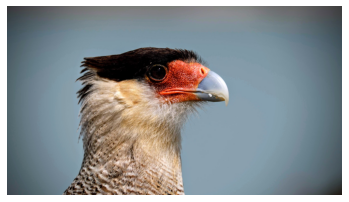

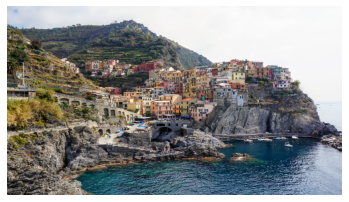

In [159]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import requests
from transform import resize_image

url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)
url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image_town.jpg'
r = requests.get(url, allow_redirects=True)
open('image_town.jpg', 'wb').write(r.content)

size=(800,450)

image = load_img('image.jpg')
image = img_to_array(image).astype(np.uint8)
data1 = np.expand_dims(resize_image(image,size), 0).astype(int)
plt.axis('off')
plt.imshow(data1[0])
plt.show()

image_town = load_img('image_town.jpg')
image_town = img_to_array(image_town).astype(np.uint8)
data2 = np.expand_dims(resize_image(image_town,size), 0).astype(int)
plt.axis('off')
plt.imshow(data2[0])
plt.show()
data=np.concatenate((data1,data2),axis=0)

> without changes:

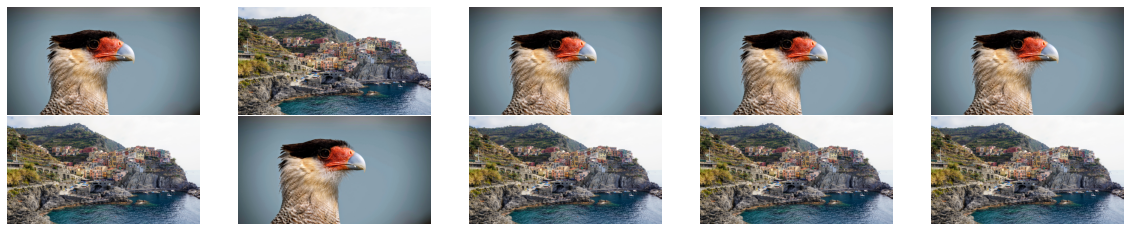

In [160]:
from transform import DataAugmentation
datagen = DataAugmentation(data)
datagen.plot(n_images=5)

> Width and Height Shift:

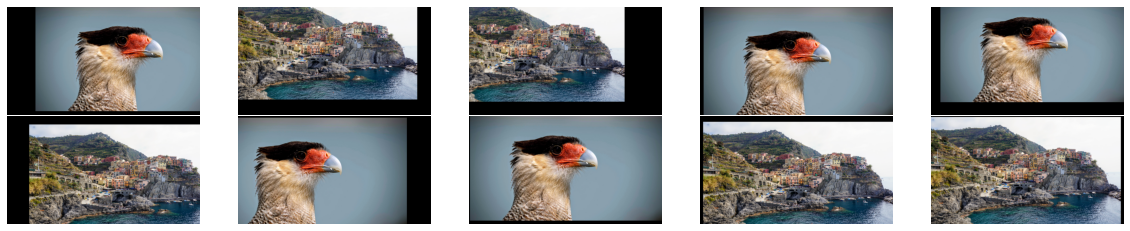

In [138]:
datagen = DataAugmentation(data)
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
datagen.plot(n_images=5)

> Image Flips:

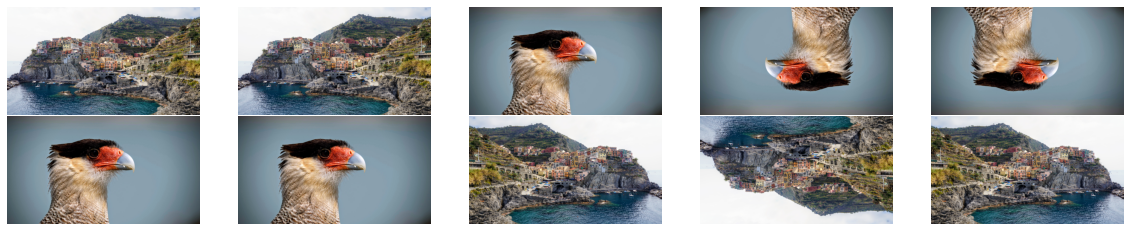

In [139]:
datagen = DataAugmentation(data)
datagen.horizontal_flip = True
datagen.vertical_flip = True
datagen.plot(n_images=5)

> Rotation:

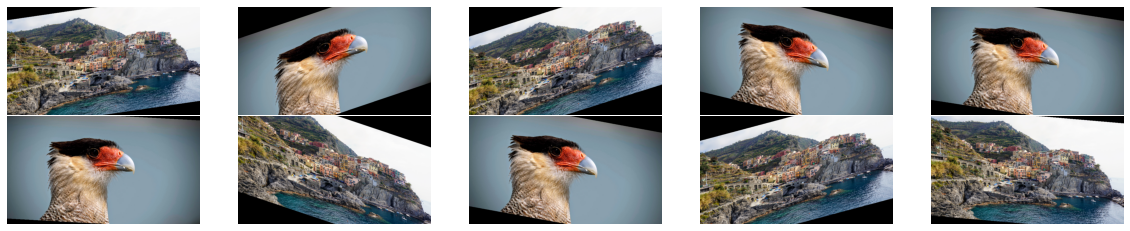

In [140]:
datagen = DataAugmentation(data)
datagen.shear_range = 20
datagen.plot(n_images=5)

> Zoom:

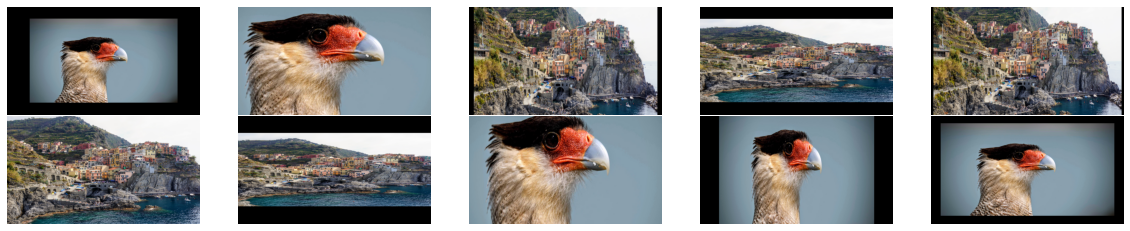

In [112]:
datagen = DataAugmentation(data)
datagen.zoom_range = [0.5, 1.5]
datagen.plot(n_images=5)

> Shear:

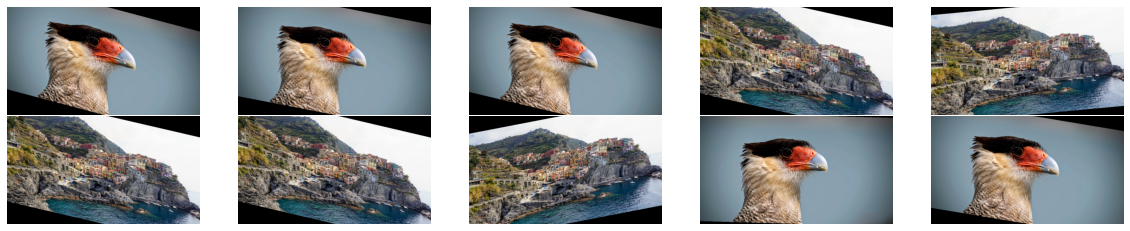

In [113]:
datagen = DataAugmentation(data)
datagen.shear_range = 20
datagen.plot(n_images=5)

> Brightness:

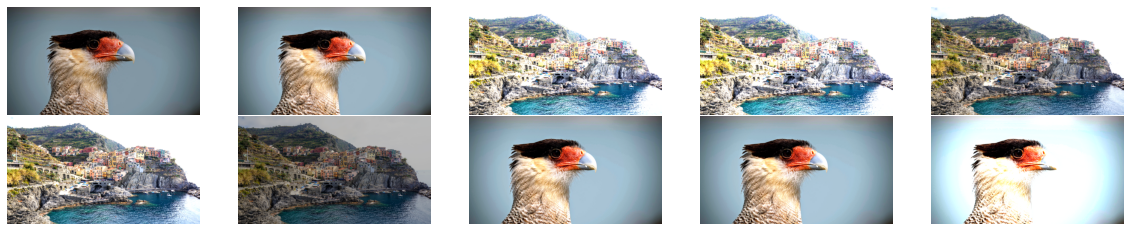

In [114]:
datagen = DataAugmentation(data)
datagen.brightness_range = [0.5, 2.0]
datagen.plot(n_images=5)

> Combining Multiple Transformations for Data Augmentation:

100%|██████████| 5/5 [00:00<00:00,  6.48it/s]


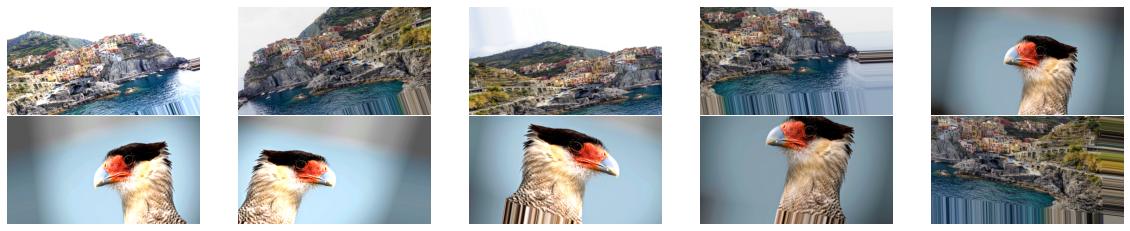

In [142]:
datagen = DataAugmentation(data,
              progressbar = True,
              fill_mode='nearest',
							horizontal_flip=True,
							width_shift_range=0.2,
							height_shift_range=0.2,
							zoom_range=[0.8, 1.2],
							rotation_range=20,
							shear_range=10,
							brightness_range = [0.75, 1.5])
datagen.plot(n_images=5)

## Part VI

(630, 1020, 3)
(2240, 3626, 3)


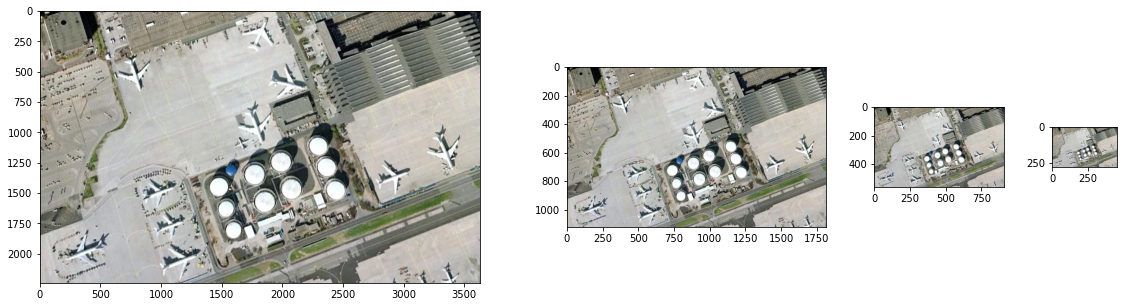

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import pyramid_gaussian
from transform import resize_image

from prepare_data import get_number_of_files, load_negative, load_positive, prepare_data, getGroundTruthList
num_scales = 4
image = load_positive(17)
print(image.shape)
target_size = (224,224)
scale= min(target_size)/min(image.shape[:-1]) *1.25* 2**(num_scales-1)
image = resize_image(image, target_size= (int(image.shape[1]*scale),int(image.shape[0]*scale)))
print(image.shape)

pyramid = tuple(pyramid_gaussian(image, max_layer=num_scales-1, downscale=2, multichannel=True))

fig, ax = plt.subplots(1, num_scales, gridspec_kw={'width_ratios': [2**i for i in range(num_scales-1,-1,-1)]})
for i in range(num_scales):
    ax[i].imshow(pyramid[i])
fig.set_size_inches(20,5)

In [163]:
overlap = 0.2
def get_image_slides(image,overlap=0.2,target_size=target_size):
    def calculate_number(tar_size,im_size,overlap):
      return int((im_size/tar_size-1)/(1-overlap))
    ncol = calculate_number(target_size[1],image.shape[1],overlap)
    nrow = calculate_number(target_size[0],image.shape[0],overlap)
    images = []
    for col in range(ncol):
      for row in range(nrow):
        c_start = col*int(target_size[1]*(1-overlap))
        c_end = c_start + target_size[1]    
        r_start = row*int(target_size[0]*(1-overlap))
        r_end = r_start + target_size[0]
        # print(r_start,r_end,c_start,c_end)
        img = image[r_start:r_end,c_start:c_end,:]
        images.append(img)
    images = np.array(images)
    return images

In [164]:
import tensorflow as tf
model = tf.keras.models.load_model('pre_train.h5')

In [ ]:
images = get_image_slides(pyramid[0],overlap=0.75,target_size=target_size).astype(np.float) / 255.
# images = x_test;
yhat = model.predict(images)
# yhat.argmax(axis=)
def estimate(images, thresh=0.2):
  yhat > thresh
# yhat = model.predict(x_test[0:10])
# plt.plot(yhat[0])
index = []
for i in range(yhat.shape[0]):
  ind = np.where(yhat[i]>0.)[0]
  ind_max = yhat[i][ind].argmax()
  print(ind_max)
  ind_max = ind_max if ind_max.shape else 0
  index.append(ind_max)